In [84]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import random


In [86]:
x_data = np.arange(0 ,100 , 0.5,dtype=np.float64)
n = x_data.shape[0]
y_data = np.linspace(0, 1000 , num=n, endpoint=False,dtype=np.float64)
for i in range(n):
    y_data[i] -= random.randint(-100, 100)

y_data

array([  -8.,  -72.,  -53.,   71.,   59.,   25.,  -45.,   31.,  -56.,
        102.,   19.,   77.,  -18.,   35.,  -19.,  -14.,  114.,   23.,
        123.,   20.,   17.,  158.,   42.,   27.,  103.,  163.,   37.,
        203.,   94.,  116.,   77.,  175.,  152.,  261.,  187.,   99.,
        153.,  178.,  196.,  279.,  117.,  182.,  286.,  159.,  229.,
        227.,  280.,  179.,  178.,  323.,  283.,  306.,  307.,  263.,
        349.,  313.,  278.,  301.,  275.,  250.,  346.,  386.,  244.,
        247.,  339.,  237.,  366.,  335.,  271.,  404.,  399.,  448.,
        446.,  459.,  383.,  284.,  451.,  311.,  371.,  412.,  394.,
        320.,  367.,  423.,  486.,  364.,  382.,  411.,  363.,  379.,
        402.,  410.,  474.,  425.,  446.,  513.,  515.,  524.,  469.,
        496.,  506.,  427.,  552.,  499.,  550.,  500.,  611.,  482.,
        481.,  521.,  645.,  615.,  530.,  606.,  540.,  601.,  531.,
        632.,  517.,  688.,  661.,  622.,  545.,  604.,  676.,  626.,
        591.,  669.,

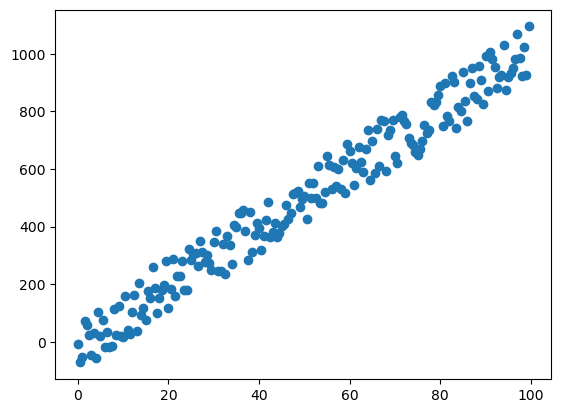

In [88]:
plt.scatter(x_data , y_data)
plt.show()


In [90]:
def compute_cost(x_data , y_data , w , b):
    m = x_data.shape[0]
    sum = 0
    for i in range(m):
        cur_x = x_data[i]
        y_predict = w *  cur_x + b
        sum += (y_predict  - y_data[i])**2
    return (1 / (2 * m)) * sum


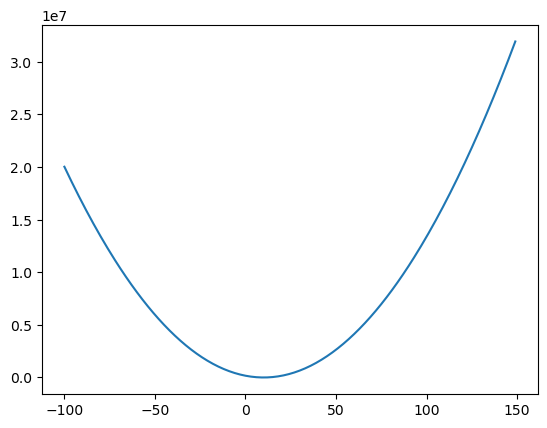

[-100  -99  -98  -97  -96  -95  -94  -93  -92  -91  -90  -89  -88  -87
  -86  -85  -84  -83  -82  -81  -80  -79  -78  -77  -76  -75  -74  -73
  -72  -71  -70  -69  -68  -67  -66  -65  -64  -63  -62  -61  -60  -59
  -58  -57  -56  -55  -54  -53  -52  -51  -50  -49  -48  -47  -46  -45
  -44  -43  -42  -41  -40  -39  -38  -37  -36  -35  -34  -33  -32  -31
  -30  -29  -28  -27  -26  -25  -24  -23  -22  -21  -20  -19  -18  -17
  -16  -15  -14  -13  -12  -11  -10   -9   -8   -7   -6   -5   -4   -3
   -2   -1    0    1    2    3    4    5    6    7    8    9   10   11
   12   13   14   15   16   17   18   19   20   21   22   23   24   25
   26   27   28   29   30   31   32   33   34   35   36   37   38   39
   40   41   42   43   44   45   46   47   48   49   50   51   52   53
   54   55   56   57   58   59   60   61   62   63   64   65   66   67
   68   69   70   71   72   73   74   75   76   77   78   79   80   81
   82   83   84   85   86   87   88   89   90   91   92   93   94   95
   96 

In [92]:
#simulation of cost function graph when b is equal to 0 
cost_data = []
w = np.arange(-100,150)
for i in w:
    error = compute_cost(x_data , y_data ,i , 0)
    cost_data.append(error)
cost_data = np.array(cost_data)
plt.plot(w, cost_data)
plt.show()
print(w , cost_data)

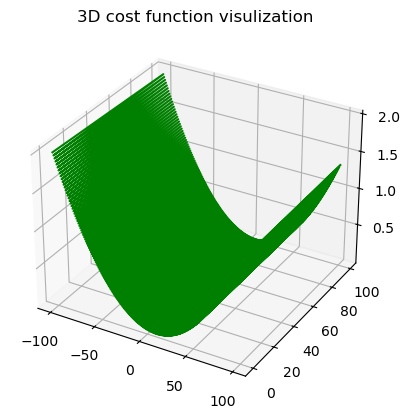

In [94]:
d_w = []
d_b = []
cost_data = []
for w in range(-100 ,100):
    for b in range(100):
        error = compute_cost(x_data , y_data ,w , b)
        cost_data.append(error)
        d_w.append(w)
        d_b.append(b)
cost_data = np.array(cost_data)
d_w = np.array(d_w)
d_b = np.array(d_b)

fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# plotting
ax.plot3D(d_w, d_b, cost_data, 'green')
ax.set_title('3D cost function visulization')
plt.show()

In [95]:
#dJ(x) / d partial derivateive of cost function   
def dJ(x_data , y_data , w , b):
    m = x_data.shape[0]
    dw  = 0
    db = 0
    for i in range(m):
        f_wb = w * x_data[i] + b
        dw += (f_wb - y_data[i]) * x_data[i]
        db += (f_wb - y_data[i])
    return dw/ m, db/m
    
    

In [96]:
def gradient_descent(w, b , alpha , iter):
    for i in range(iter):
        dw , db = dJ(x_data ,y_data , w ,b)
        w -= dw * alpha
        b -= db * alpha
    return w , b

In [97]:
w ,b  = gradient_descent(0 , 0 , 1.0e-6 ,1000)
print(w,b)

9.678141790312354 0.14170471124840114


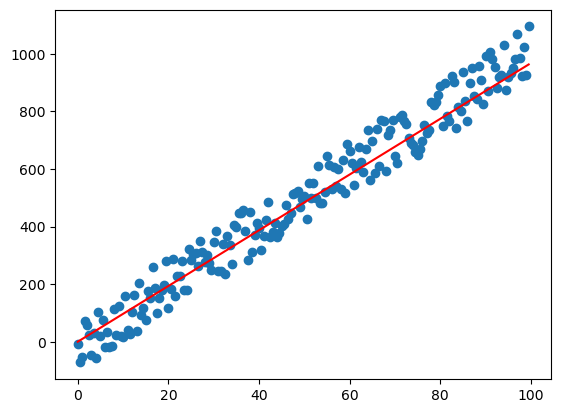

In [98]:
plt.scatter(x_data , y_data)
y = w * x_data + b
plt.plot(x_data, y, color='red')
plt.show()


In [120]:
# we can use this model to predict output 
x = np.random.rand(100) * 1000
for p in x:
    print(f"x = {p} output : {w * p + b}")


x = 803.2653069983679 output : 7774.257241080236
x = 158.24514059938332 output : 1531.6606130599944
x = 76.01855417567516 output : 735.8600507179739
x = 780.5163625404307 output : 7554.089731036379
x = 957.9924983403635 output : 9271.728937704858
x = 25.751231452584065 output : 249.36577398450814
x = 262.9854471887275 output : 2545.3521513924547
x = 841.9705159404249 output : 8148.851741245128
x = 556.4216336180392 output : 5385.269170063863
x = 215.60862678822988 output : 2086.832565982276
x = 730.0423030278306 output : 7065.59462634077
x = 548.1935537343825 output : 5305.636646287817
x = 182.38704586091416 output : 1765.3093952693775
x = 973.7274280637333 output : 9424.013818628233
x = 488.6065449325712 output : 4728.945126243297
x = 879.5381349437944 output : 8512.43648468417
x = 768.2783609688648 output : 7435.648616596699
x = 218.29037894968462 output : 2112.7869436473115
x = 852.5326702475522 output : 8251.073768240665
x = 376.4906062152078 output : 3643.8711743826834
x = 864.641